## Importing necessary packages

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
%matplotlib inline
sns.set_style("darkgrid")

## Load the dataset

In [123]:
df=pd.read_csv("./Life Expectancy Data.csv")

## An overview of the dataset

In [124]:
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [125]:
df.shape

(2938, 22)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [127]:
copy_df = df.copy()

In [128]:
# Replacing the spaces in column names with underscore for ease of use
copy_df.rename(columns = lambda x: x.strip().replace(' ', '_').lower(), inplace=True)
# Modifying the column name that doesn't match our underscoring convention 
copy_df.rename(columns = {'thinness__1-19_years':'thinness_10-19_years'}, inplace=True)
print((f'Number of columns: {len(copy_df.columns)}'))
copy_df.columns

Number of columns: 22


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

## Checking for missing values

In [129]:
def checkmissing(df):
    missing=df.isna().sum().reset_index()
    missing.columns=["Features","Missing_Values"]
    missing["Missing_Percent"]=round(missing.Missing_Values/len(df)*100,2)
    return missing[missing.Missing_Values>0]

In [130]:
checkmissing(df)

,Features,Missing_Values,Missing_Percent
3,Life expectancy,10,0.34
4,Adult Mortality,10,0.34
6,Alcohol,194,6.60
8,Hepatitis B,553,18.82
10,BMI,34,1.16
12,Polio,19,0.65
13,Total expenditure,226,7.69
14,Diphtheria,19,0.65
16,GDP,448,15.25
17,Population,652,22.19


## Impute the missing values by interpolation

In [131]:
missing_cols = ['life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b',
       'bmi', 'polio', 'total_expenditure','diphtheria', 'gdp', 'population', 
        'thinness_10-19_years', 'thinness_5-9_years', 
        'income_composition_of_resources', 'schooling']

for col in missing_cols:
    copy_df.loc[:,col] = copy_df.loc[:,col].interpolate(limit_direction='both')

## Exporatory Data Analysis(EDA)

Graphical EDA:

Outlier detection using boxplot 

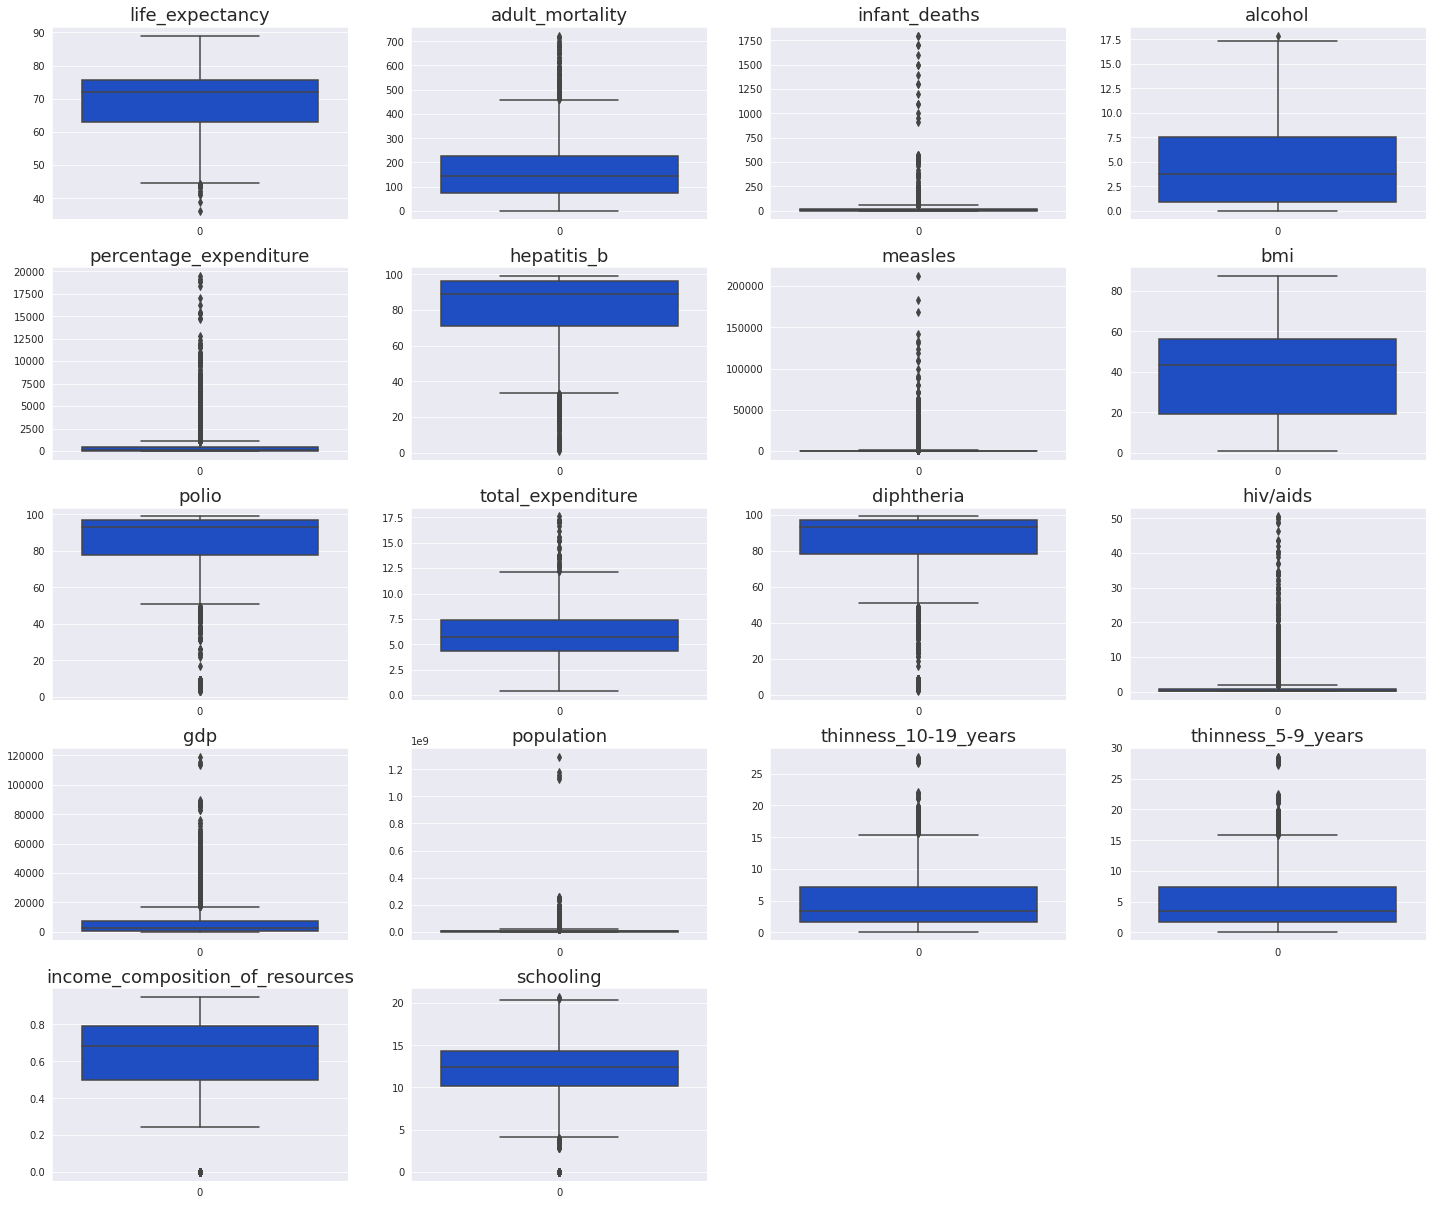

In [132]:
num_cols = ['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']
plt.figure(figsize=(20,60))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 4, i+1)
    sns.boxplot(data=copy_df[col], color=('xkcd:blue'))
    plt.title(f'{col}', fontsize=18)
plt.tight_layout()
plt.show()

Outlier detection using histogram and getting a look at the distribution of data

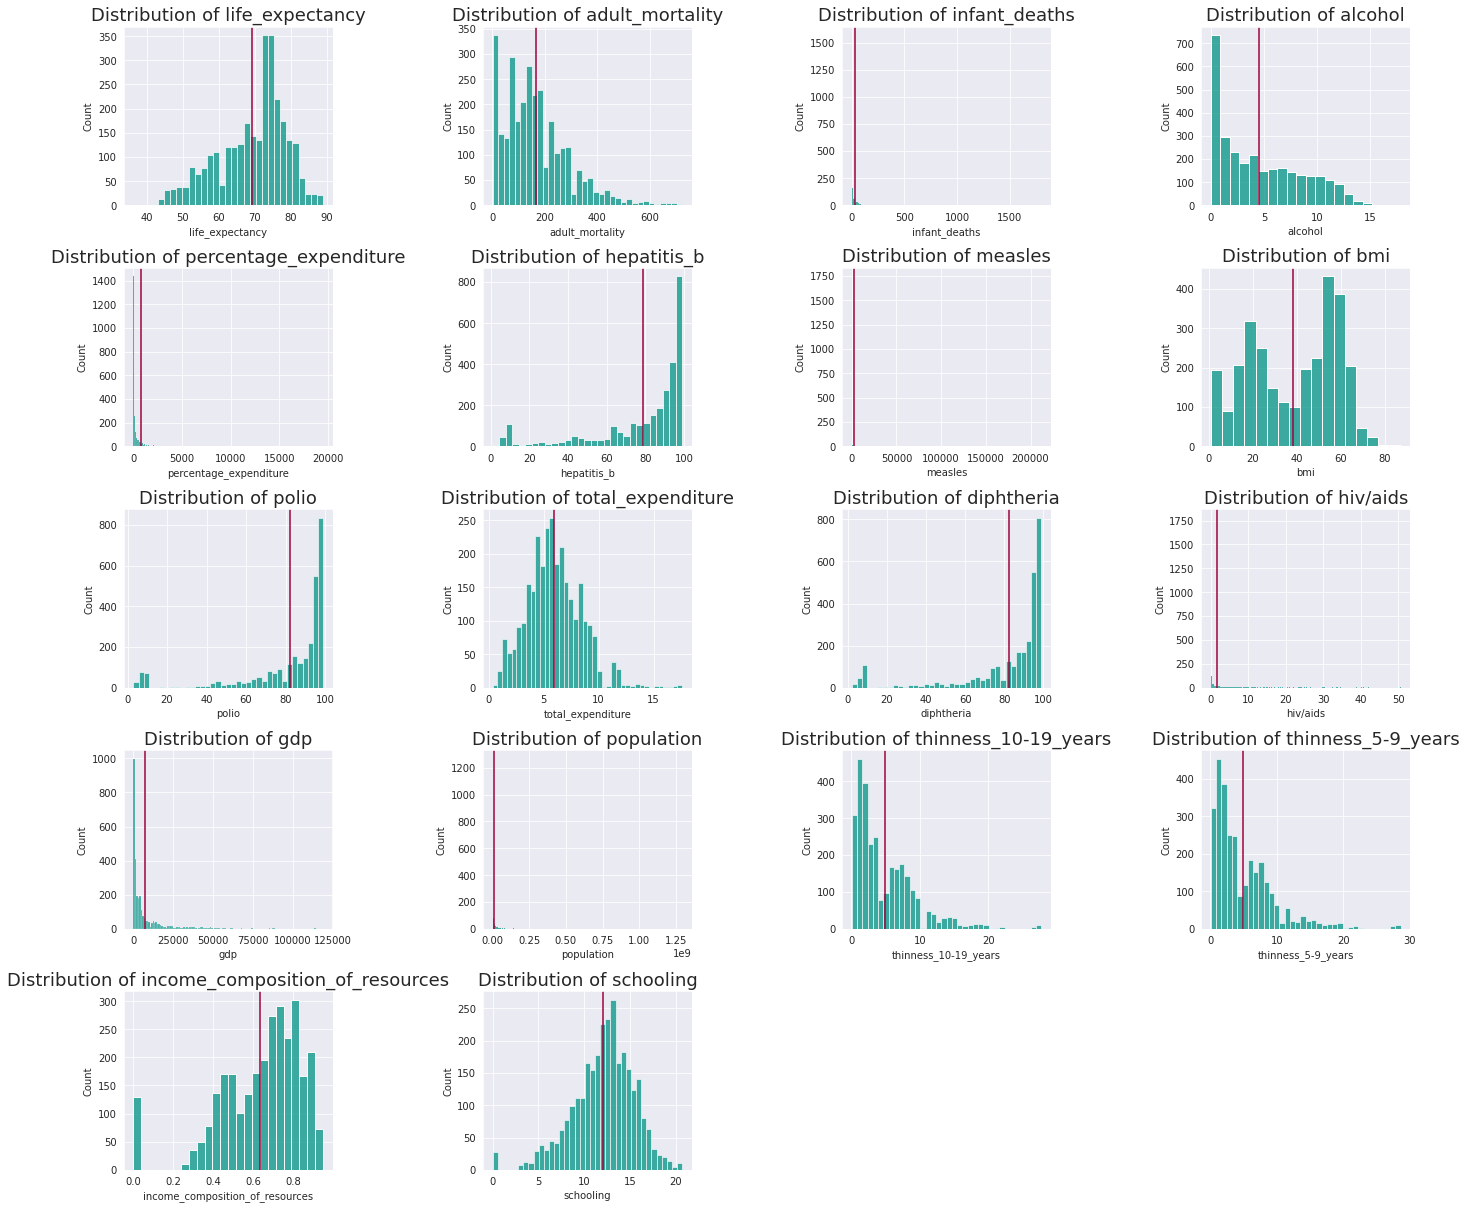

In [133]:
plt.figure(figsize=(20,60))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 4, i+1)
    sns.histplot(copy_df[col], color=('xkcd:teal'))
    plt.title(f'Distribution of {col}', fontsize=18)
    plt.axvline(copy_df.loc[:,col].mean(), color=('xkcd:cranberry')) #the red line shows the mean
plt.tight_layout()
plt.show()

In [134]:
df.columns=['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness', 'thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling']

In [135]:
y= df["Life_expectancy"]
cdf=  df.drop(["Life_expectancy"], axis=1)
num= cdf.select_dtypes(exclude= "O")

 Non Graphical EDA:

In [136]:
round(num.describe(),2)

,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2.286000e+03,2904.00,2904.00,2771.00,2775.00
mean,2007.52,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.275338e+07,4.84,4.87,0.63,11.99
std,4.61,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,6.101210e+07,4.42,4.51,0.21,3.36
min,2000.00,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,2004.00,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,1.957932e+05,1.60,1.50,0.49,10.10
50%,2008.00,144.00,3.00,3.76,64.91,92.00,17.00,43.50,4.00,93.00,5.76,93.00,0.10,1766.95,1.386542e+06,3.30,3.30,0.68,12.30
75%,2012.00,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7.420359e+06,7.20,7.20,0.78,14.30
max,2015.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1.293859e+09,27.70,28.60,0.95,20.70


## Countries vs Life Expectancy

In [137]:
print("="*46)
print("Top 10 countries with the most life expectancy")
print("="*46)
print(df.groupby("Country").Life_expectancy.mean().sort_values(ascending =False).head(10))
print("="*46)
print("Top 10 countries with least life expectancy")
print("="*46)
print(df.groupby("Country").Life_expectancy.mean().sort_values(ascending =True).head(10))

Top 10 countries with the most life expectancy
Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Italy          82.18750
Spain          82.06875
Australia      81.81250
Norway         81.79375
Canada         81.68750
Name: Life_expectancy, dtype: float64
Top 10 countries with least life expectancy
Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Chad                        50.38750
Côte d'Ivoire               50.38750
Zimbabwe                    50.48750
Swaziland                   51.32500
Nigeria                     51.35625
Name: Life_expectancy, dtype: float64


#### Countries Vs Population:

In [138]:
print("="*55)
print("Top 10 Countries with Least Population from the dataset")
print("="*55)
print(df.groupby("Country").Population.mean().sort_values(ascending =True).head(10))
print("="*55)
print("Top 10 Countries with Most Population from the dataset")
print("="*55)
print(df.groupby("Country").Population.mean().sort_values(ascending =False).head(10))


Top 10 Countries with Least Population from the dataset
Country
Palau           292.0000
Tuvalu         1819.0000
Maldives       3334.2500
Georgia       10152.3750
Sri Lanka     10844.8125
Tonga         26589.8125
Israel        27862.8750
Kiribati      35919.9375
Seychelles    61543.8125
Japan         97384.0625
Name: Population, dtype: float64
Top 10 Countries with Most Population from the dataset
Country
India                 4.214677e+08
Indonesia             1.165553e+08
Brazil                8.812807e+07
Nigeria               7.087700e+07
Pakistan              6.902796e+07
Russian Federation    5.976209e+07
Ethiopia              4.395076e+07
Bangladesh            4.298516e+07
Germany               3.875735e+07
Philippines           3.726540e+07
Name: Population, dtype: float64


#### Countries Vs GDP:

In [139]:
print("="*40)
print("Top 10 Countries with Lowest GDP")
print("="*40)
print(df.groupby("Country").GDP.mean().sort_values(ascending =True).head(10))
print("="*40)
print("Top 10 Countries with Highest GDP")
print("="*40)
print(df.groupby("Country").GDP.mean().sort_values(ascending =False).head(10))



Top 10 Countries with Lowest GDP
Country
Nauru           136.183210
Burundi         137.815321
Malawi          237.504042
Liberia         246.281748
Eritrea         259.395356
Niger           259.782441
Ethiopia        264.970950
Sierra Leone    271.505561
Senegal         274.611166
Guinea          279.464798
Name: GDP, dtype: float64
Top 10 Countries with Highest GDP
Country
Switzerland    57362.874601
Luxembourg     53257.012741
Qatar          40748.444104
Netherlands    34964.719797
Australia      34637.565047
Ireland        33835.272005
Austria        33827.476309
Denmark        33067.407916
Singapore      32790.105907
Kuwait         31914.378339
Name: GDP, dtype: float64


## Feature Engineering:

In [140]:
checkmissing(cdf)# calling the fuction for Checking for missing values

,Features,Missing_Values,Missing_Percent
3,Adult_Mortality,10,0.34
5,Alcohol,194,6.60
7,Hepatitis_B,553,18.82
9,BMI,34,1.16
11,Polio,19,0.65
12,Total_expenditure,226,7.69
13,Diphtheria,19,0.65
15,GDP,448,15.25
16,Population,652,22.19
17,thinness,34,1.16


We fill the missing values with mean of the column it belongs to

In [142]:
missing_features= cdf.columns[cdf.isna().any()]
for f in missing_features:
    cdf[f]=cdf[f].fillna(cdf[f].mean())

Imputing the life expectancy column with median

In [143]:
y.fillna(y.median(), inplace=True)

### Label encoding

In [144]:
col= ["Country", "Year", "Status"]
for feature in col:
    label_encoder= LabelEncoder()
    cdf[feature]= label_encoder.fit_transform(cdf[feature])
    cdf[feature].astype("int64")

### Feature selection

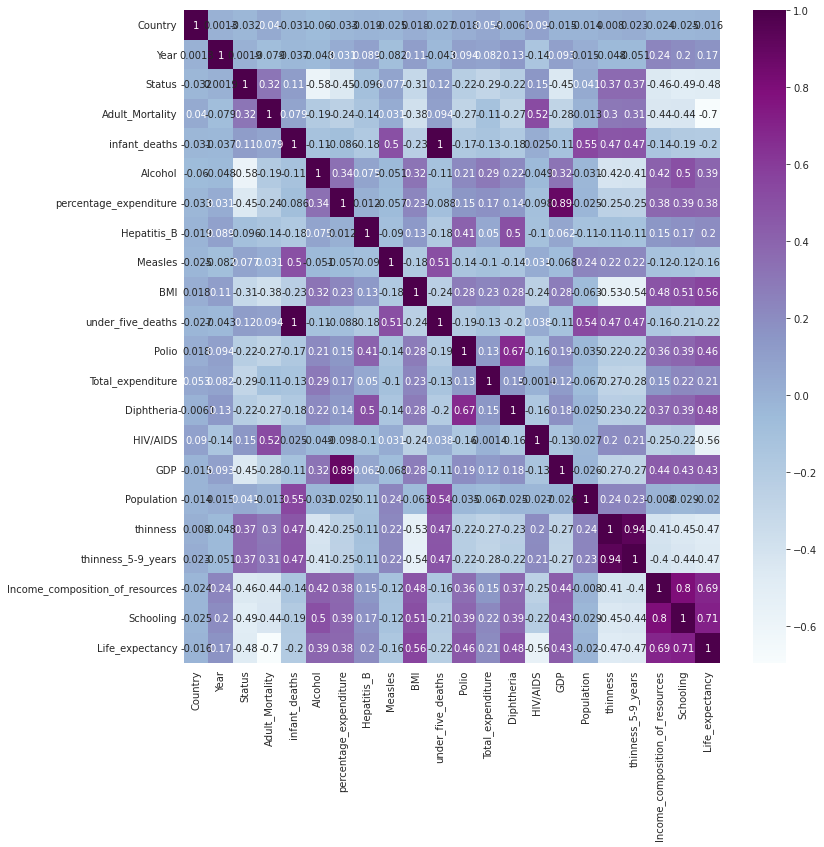

In [145]:
plt.figure(figsize= [12,12])
sns.heatmap(pd.concat([cdf,y], axis=1).corr(), annot=True, cmap= "BuPu")

Now we will standardize the data (making mean=0 and standard deviation=1)

In [146]:
columns= [ 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness',
       'Income_composition_of_resources', 'Schooling']
for feature in columns:
    ss= StandardScaler()
    cdf[[feature]]= ss.fit_transform(cdf[[feature]])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

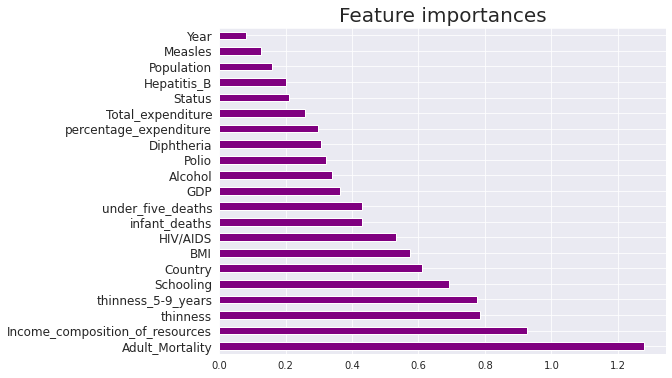

In [147]:
plt.figure(figsize= [8,6])
pd.Series(mutual_info_regression(cdf, y), index= cdf.columns).sort_values(ascending=False).plot(kind="barh",color="purple")
plt.title("Feature importances", fontsize= 20)
plt.yticks(fontsize= 12)

As the contribution of the year feature is lesser than 0.1 we drop the column from our dataset

In [148]:
cdf=cdf.drop(["Year"],axis=1)

## Training and Testing the Model

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test= train_test_split(cdf, y, test_size= 0.20, random_state=9)# test size is 20%

Evaluating the performance of different models

In [151]:
columns= pd.Series(mutual_info_regression(cdf, y), index= cdf.columns).sort_values(ascending= False)[:10].index
datacopy= cdf[columns]
target= y
    
X_train,X_test, y_train, y_test= train_test_split(datacopy, target, test_size= 0.2, random_state=9)  

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse

    
algs= [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), DecisionTreeRegressor(), LinearRegression(), SVR()]
    
    
for i in algs:
    model= i
    model.fit(X_train, y_train)
    y_pred1= model.predict(X_test)
    y_pred2= model.predict(X_train)
    print(i, "Train Root Mean Squared error:", np.sqrt(mse(y_train, y_pred2)))
    print(i, "Train Accuracy:", (1-mape(y_train, y_pred2))*100)
    print("*"*50)
    print(i, "Test Root Mean Squared error:", np.sqrt(mse(y_test, y_pred1)))
    print(i, "Test Accuracy:", (1-mape(y_test, y_pred1))*100)
    print("="*70)

RandomForestRegressor() Train Root Mean Squared error: 0.6639378633448914
RandomForestRegressor() Train Accuracy: 99.41810692483017
**************************************************
RandomForestRegressor() Test Root Mean Squared error: 1.844569519585813
RandomForestRegressor() Test Accuracy: 98.35672926268153
AdaBoostRegressor() Train Root Mean Squared error: 2.899467770994554
AdaBoostRegressor() Train Accuracy: 96.56058783197993
**************************************************
AdaBoostRegressor() Test Root Mean Squared error: 3.130876971532939
AdaBoostRegressor() Test Accuracy: 96.31270086297161
GradientBoostingRegressor() Train Root Mean Squared error: 1.8922942356926271
GradientBoostingRegressor() Train Accuracy: 97.9944852242488
**************************************************
GradientBoostingRegressor() Test Root Mean Squared error: 2.3057238746756528
GradientBoostingRegressor() Test Accuracy: 97.53984274717929
DecisionTreeRegressor() Train Root Mean Squared error: 2.53873225

We choose Random forest regressor as it has the highest test accuracy

In [152]:
rfr= RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred= rfr.predict(X_test)
print( "RMSE value:", np.sqrt(mse(y_test, y_pred)))

RMSE value: 1.827937117940017


For Random Forest Regressor:

In [153]:
columns= pd.Series(mutual_info_regression(cdf, y), index= cdf.columns).sort_values(ascending= False)[:10].index
datacopy= cdf[columns]
target= y
    
X_train,X_test, y_train, y_test= train_test_split(datacopy, target, test_size= 0.2, random_state=9)
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=90)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
y_pred2= rf.predict(X_train)
  
print("Test Root Mean Squared error:", round(np.sqrt(mse(y_test, y_pred)),2))
print("Test Accuracy:", round((1-mape(y_test, y_pred))*100,2))
print("Mean Absolute Percentage Error:", round(mape(y_test, y_pred)*100))

Test Root Mean Squared error: 1.82
Test Accuracy: 98.37
Mean Absolute Percentage Error: 2


Text(0.5, 0, 'Predicted')

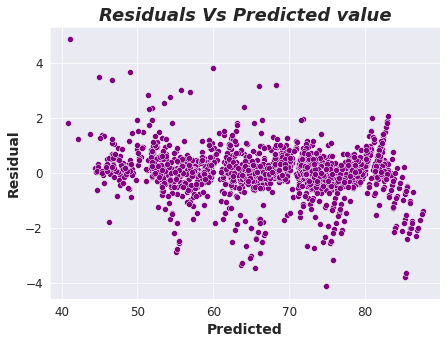

In [154]:
plt.figure(figsize= [7,5])
sns.scatterplot(y=(y_pred2-y_train), x= y_pred2,color= "purple")
plt.title("Residuals Vs Predicted value", fontsize= 18,fontweight="bold", fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Residual", fontsize= 14, fontweight="bold")
plt.xlabel("Predicted", fontsize=14, fontweight="bold")

Text(0.5, 0, 'Actual')

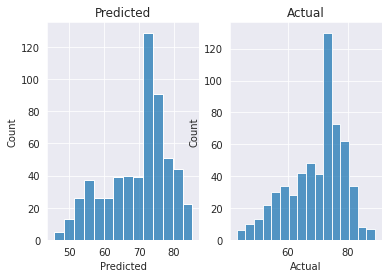

In [155]:
plt.subplot(1,2,1)
sns.histplot(y_pred)
plt.title("Predicted")
plt.xlabel("Predicted")
plt.subplot(1,2,2)
sns.histplot(y_test)
plt.title("Actual")
plt.xlabel("Actual")